# OBJECTIVE:

# To do Vectorizing on Amazon food reviews

In [24]:
%%time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Wall time: 0 ns


In [2]:
#loading amazon food review data set
data=pd.read_csv('Reviews.csv')
print("shape",data.shape)
data.head()

shape (568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
%%time
data['Score'].value_counts()

Wall time: 222 ms


5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

In [4]:
%%time
#Converting score coloumn to positive or negative review
data['Score'] = data['Score'].apply(lambda x : 'pos' if x > 3 else 'neg')
data.groupby('Score')['Summary'].count()

Wall time: 496 ms


In [7]:
%%time
# Functions to save objects for later use and retireve it
import pickle
def savetofile(obj,filename):
   pickle.dump(obj,open(filename,"wb"))
def openfromfile(filename):
   temp = pickle.load(open(filename,"rb"))
   return temp

Wall time: 0 ns


In [14]:
%%time
#Loading the variable from file
data_100000 = openfromfile("f_string.pickle")

Wall time: 467 ms


# Preprocessed data:

In [15]:
%%time
data_100000.head()

Wall time: 1e+03 µs


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,pos,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,pos,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,rememb see show air televis year ago child sis...
2,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,pos,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...
3,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,pos,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",twist rumplestiskin captur film star michael k...
4,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,pos,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,beetlejuic excel funni movi keaton hilari wack...


In [16]:
%%time
labels = data_100000['Score']
data_100000['Score'].value_counts()

Wall time: 32 ms


In [17]:
%%time
#Making the index from 0 to end
data_100000 = data_100000.reset_index(drop=True)
data_100000.shape

Wall time: 79 ms


In [18]:
%%time
#sorting the data based on time
data_100000.sort_values('Time',inplace=True)
data_100000 = data_100000.reset_index(drop=True)

Wall time: 76 ms


In [19]:
%%time
#In the Score column, assigning positive as 1 and negative as 0
def pos_neg(x):
    if x == 'pos':
        return 1
    return 0
data_100000['Score'] = data_100000['Score'].map(pos_neg)

Wall time: 110 ms


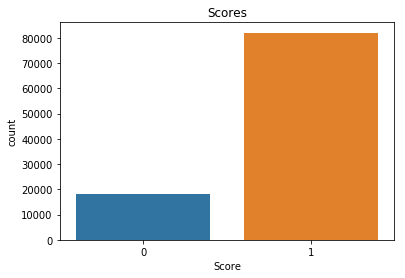

Wall time: 154 ms


In [20]:
%%time
import seaborn as sns
import matplotlib.pyplot as plt
ax=plt.axes()
sns.countplot(data_100000.Score,ax=ax)
plt.title("Scores")
plt.show()
data_100000['Score'].value_counts()

In [21]:
%%time
savetofile(data_100000,"prepocessed_data.pickle")

Wall time: 1.26 s


In [22]:
%%time
#Loading the variable from file
final_100000 = openfromfile("prepocessed_data.pickle")

Wall time: 530 ms


In [23]:
final_100000.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,rememb see show air televis year ago child sis...
2,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...
3,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",twist rumplestiskin captur film star michael k...
4,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,1,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,beetlejuic excel funni movi keaton hilari wack...


Splitting data for simple cross validation:

In [4]:
%%time
#storing cleanedtext into x and Score into y
x = final_100000['CleanedText']
y = final_100000['Score']
#Splitting the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
#splitting train data as train as 60% and  cross_validation as 20% and test data as 20%
x_tr, x_cv, y_tr, y_cv = train_test_split(X_train, Y_train, test_size=0.25,shuffle=False)
print(x_tr.shape)
print(x_cv.shape)
print(X_test.shape)
print(y_tr.shape)
print(y_cv.shape)
print(Y_test.shape)

(60000,)
(20000,)
(20000,)
(60000,)
(20000,)
(20000,)
Wall time: 3.43 s


Splitting data for k fold cross validation:

In [5]:
%%time
#storing cleanedtext into x and Score into y
x = final_100000['CleanedText']
y = final_100000['Score']
#Splitting the data into train and test data with 70:30 ratio.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(70000,)
(30000,)
(70000,)
(30000,)
Wall time: 24 ms


# 1.BOW:

Vectorising the simple cross validation data:

In [24]:
%%time
#Bag of words:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
#vectorizing the train data,cross validate data and test data.
bow = count_vect.fit_transform(x_tr)
bow1 = count_vect.transform(x_cv)
bow2 = count_vect.transform(X_test)
#preprocessing the train data,cross validate data and test data.
from sklearn import preprocessing
tr_bow_x = preprocessing.normalize(bow)
cv_bow_x = preprocessing.normalize(bow1)
te_bow_x = preprocessing.normalize(bow2)
savetofile(tr_bow_x,"tr_bow_x.pickle")
savetofile(cv_bow_x,"cv_bow_x.pickle")
savetofile(te_bow_x,"te_bow_x.pickle")

Wall time: 5.25 s


In [26]:
%%time
#conversting sparse data into dense data
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=300, n_iter=5)
dense_tr_bow_x=svd.fit_transform(tr_bow_x)  
dense_cv_bow_x=svd.transform(cv_bow_x)  
dense_te_bow_x=svd.transform(te_bow_x)
savetofile(dense_tr_bow_x,"dense_tr_bow_x.pickle")
savetofile(dense_cv_bow_x,"dense_cv_bow_x.pickle")
savetofile(dense_te_bow_x,"dense_te_bow_x.pickle")

Wall time: 25.9 s


Vectorising the K-fold cross validation data:

In [27]:
%%time
#Bag of words:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
#vectorizing the train data and test data.
bow1 = count_vect.fit_transform(x_train)
bow2 = count_vect.transform(x_test)
#preprocessing the train data and test data.
from sklearn import preprocessing
kfold_tr_bow_x = preprocessing.normalize(bow1)
kfold_te_bow_x = preprocessing.normalize(bow2)
savetofile(kfold_tr_bow_x,"kfold_tr_bow_x.pickle")
savetofile(kfold_te_bow_x,"kfold_te_bow_x.pickle")

Wall time: 5.36 s


In [28]:
%%time
#conversting sparse data into dense data
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=300, n_iter=5)
dense_kfold_tr_bow_x=svd.fit_transform(kfold_tr_bow_x)
dense_kfold_te_bow_x=svd.transform(kfold_te_bow_x)
print(dense_kfold_tr_bow_x.shape)
print(dense_kfold_te_bow_x.shape)
savetofile(dense_kfold_tr_bow_x,"dense_kfold_tr_bow_x.pickle")
savetofile(dense_kfold_te_bow_x,"dense_kfold_te_bow_x.pickle")

(70000, 300)
(30000, 300)
Wall time: 29.5 s


# 2.TF-IDF:

Vectorising the simple cross validation data:

In [7]:
%%time
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
#vectorizing the train data,cross validate data and test data.
tfidf1 = tfidf.fit_transform(x_tr)
tfidf2 = tfidf.transform(x_cv)
tfidf3 = tfidf.transform(X_test)
#preprocessing the train data,cross validate data and test data.
from sklearn import preprocessing
tr_tfidf_x = preprocessing.normalize(tfidf1)
cv_tfidf_x= preprocessing.normalize(tfidf2)
te_tfidf_x= preprocessing.normalize(tfidf3)
savetofile(tr_tfidf_x,"tr_tfidf_x.pickle")
savetofile(cv_tfidf_x,"cv_tfidf_x.pickle")
savetofile(te_tfidf_x,"te_tfidf_x.pickle")

Wall time: 7.48 s


In [8]:
%%time
#Loading the variable from file
tr_tfidf_x= openfromfile("tr_tfidf_x.pickle")
cv_tfidf_x= openfromfile("cv_tfidf_x.pickle")
te_tfidf_x= openfromfile("te_tfidf_x.pickle")

Wall time: 176 ms


In [10]:
%%time
#conversting sparse data into dense data
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=300, n_iter=5)
dense_tr_tfidf_x =svd.fit_transform(tr_tfidf_x)
dense_cv_tfidf_x =svd.transform(cv_tfidf_x)
dense_te_tfidf_x =svd.transform(te_tfidf_x)

Wall time: 31.1 s


In [11]:
print(dense_tr_tfidf_x.shape)
print(dense_cv_tfidf_x.shape)
print(dense_te_tfidf_x.shape)
savetofile(dense_tr_tfidf_x,"dense_tr_tfidf_x.pickle")
savetofile(dense_cv_tfidf_x,"dense_cv_tfidf_x.pickle")
savetofile(dense_te_tfidf_x,"dense_te_tfidf_x.pickle")

(60000, 300)
(20000, 300)
(20000, 300)


Vectorising the K-fold cross validation data:

In [13]:
%%time
#TFIDF:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
#vectorizing the train data and test data.
tfidf1 = tfidf.fit_transform(x_train)
tfidf2 = tfidf.transform(x_test)
#preprocessing the train data test data.
from sklearn import preprocessing
kfold_tr_tfidf_x = preprocessing.normalize(tfidf1)
kfold_te_tfidf_x= preprocessing.normalize(tfidf2)

Wall time: 7.24 s


In [92]:
%%time
savetofile(kfold_tr_tfidf_x,"kfold_tr_tfidf_x.pickle")
savetofile(kfold_te_tfidf_x,"kfold_te_tfidf_x.pickle")

Wall time: 421 ms


In [14]:
%%time
#conversting sparse data into dense data
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=300, n_iter=5)
dense_kfold_tr_tfidf_x=svd.fit_transform(kfold_tr_tfidf_x)
dense_kfold_te_tfidf_x=svd.transform(kfold_te_tfidf_x)
print(dense_kfold_tr_tfidf_x.shape)
print(dense_kfold_te_tfidf_x.shape)
savetofile(dense_kfold_tr_tfidf_x,"dense_kfold_tr_tfidf_x.pickle")
savetofile(dense_kfold_te_tfidf_x,"dense_kfold_te_tfidf_x.pickle")

(70000, 300)
(30000, 300)
Wall time: 40 s


# 3.Avg-W2V:

Vectorising the simple cross validation data:

In [37]:
%%time
# converting train data into avg_w2vec data
list_of_sent_tr=[]
for sent in x_tr.values:
    list_of_sent_tr.append(sent.split())

Wall time: 578 ms


In [38]:
%%time
#training w2vec model on train data
import gensim
from gensim.models import Word2Vec
w2v_model_tr=gensim.models.Word2Vec(list_of_sent_tr,min_count=5,size=50, workers=4)
words_tr = list(w2v_model_tr.wv.vocab)
print(len(words_tr))

9986
Wall time: 12.3 s


In [39]:
%%time
#finding avg w2v of train data
sent_vectors_tr = []; 
for sent in list_of_sent_tr:
    sent_vec = np.zeros(50) 
    cnt_words =0; 
    for word in sent:
        try:
            vec = w2v_model_tr.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors_tr.append(sent_vec)
print(len(sent_vectors_tr))
print(len(sent_vectors_tr[0]))

60000
50
Wall time: 10.5 s


In [40]:
%%time
#preprocessing avg w2v of train data
from sklearn import preprocessing
avg_w2v_tr=preprocessing.scale(sent_vectors_tr)
print("standardized data shape is",avg_w2v_tr.shape)

standardized data shape is (60000, 50)
Wall time: 173 ms


In [50]:
%%time
savetofile(avg_w2v_tr,'avg_w2v_tr.pickle')

Wall time: 506 ms


In [21]:
%%time
#converting cv data into avg_w2vec data
list_of_sent_cv=[]
for sent in x_cv.values:
    list_of_sent_cv.append(sent.split())

Wall time: 138 ms


In [23]:
%%time
#finding avg w2v of cv data
sent_vectors_cv = [];
for sent in list_of_sent_cv: 
    sent_vec = np.zeros(50) 
    cnt_words =0; 
    for word in sent: 
        try:
            vec = w2v_model_tr.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors_cv.append(sent_vec)
print(len(sent_vectors_cv))
print(len(sent_vectors_cv[0]))

20000
50
Wall time: 3.91 s


In [24]:
%%time
#preprocessing avg w2v of cv data
from sklearn import preprocessing
avg_w2v_cv=preprocessing.scale(sent_vectors_cv)
print("standardized data shape is",avg_w2v_cv.shape)

standardized data shape is (20000, 50)
Wall time: 64 ms


In [51]:
%%time
savetofile(avg_w2v_cv,'avg_w2v_cv.pickle')

Wall time: 35 ms


In [78]:
%%time
#converting test data into avg_w2vec data
list_of_sent_te=[]
for sent in X_test.values:
    list_of_sent_te.append(sent.split())

Wall time: 251 ms


In [79]:
print(len( list_of_sent_te))

20000


In [30]:
%%time
#finding avg w2v of test data
sent_vectors_te = [];
for sent in list_of_sent_te: 
    sent_vec = np.zeros(50) 
    cnt_words =0; 
    for word in sent: 
        try:
            vec = w2v_model_tr.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors_te.append(sent_vec)
print(len(sent_vectors_te))
print(len(sent_vectors_te[0]))

20000
50
Wall time: 3.95 s


In [31]:
%%time
#preprocessing avg w2v of test data
from sklearn import preprocessing
avg_w2v_te=preprocessing.scale(sent_vectors_te)
print("standardized data shape is",avg_w2v_te.shape)

standardized data shape is (20000, 50)
Wall time: 61 ms


In [52]:
%%time
savetofile(avg_w2v_te,'avg_w2v_te.pickle')

Wall time: 35 ms


Vectorising the K-fold cross validation data:

In [54]:
%%time
# converting train data into avg_w2vec data
list_of_sent_tr_kfold=[]
for sent in x_train.values:
    list_of_sent_tr_kfold.append(sent.split())

Wall time: 1.07 s


In [55]:
%%time
#training w2vec model on train data
import gensim
from gensim.models import Word2Vec
w2v_model_tr_kfold=gensim.models.Word2Vec(list_of_sent_tr_kfold,min_count=5,size=50, workers=4)
words_tr_kfold = list(w2v_model_tr_kfold.wv.vocab)
print(len(words_tr_kfold))

10724
Wall time: 14.2 s


In [56]:
%%time
#finding avg w2v of train data
sent_vectors_tr_kfold = []; 
for sent in list_of_sent_tr_kfold:
    sent_vec = np.zeros(50) 
    cnt_words =0; 
    for word in sent:
        try:
            vec = w2v_model_tr_kfold.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors_tr_kfold.append(sent_vec)
print(len(sent_vectors_tr_kfold))
print(len(sent_vectors_tr_kfold[0]))

70000
50
Wall time: 12.3 s


In [57]:
%%time
#preprocessing avg w2v of train data
from sklearn import preprocessing
kfold_avg_w2v_tr=preprocessing.scale(sent_vectors_tr_kfold)
print("standardized data shape is",kfold_avg_w2v_tr.shape)

standardized data shape is (70000, 50)
Wall time: 205 ms


In [63]:
%%time
savetofile(kfold_avg_w2v_tr,'kfold_avg_w2v_tr.pickle')

Wall time: 337 ms


In [59]:
%%time
#converting test data into avg_w2vec data
list_of_sent_te_kfold=[]
for sent in x_test.values:
    list_of_sent_te_kfold.append(sent.split())

Wall time: 215 ms


In [60]:
%%time
#finding avg w2v of test data
sent_vectors_te_kfold = [];
for sent in list_of_sent_te_kfold: 
    sent_vec = np.zeros(50) 
    cnt_words =0; 
    for word in sent: 
        try:
            vec = w2v_model_tr_kfold.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors_te_kfold.append(sent_vec)
print(len(sent_vectors_te_kfold))
print(len(sent_vectors_te_kfold[0]))

30000
50
Wall time: 5.34 s


In [61]:
%%time
#preprocessing avg w2v of test data
from sklearn import preprocessing
kfold_avg_w2v_te=preprocessing.scale(sent_vectors_te_kfold)
print("standardized data shape is",kfold_avg_w2v_te.shape)

standardized data shape is (30000, 50)
Wall time: 87 ms


In [90]:
%%time
savetofile(kfold_avg_w2v_te,'kfold_avg_w2v_te.pickle')

Wall time: 78 ms


# 4.Tf-idf- W2V

Vectorising the simple cross validation data:

In [48]:
#training tfidf model on train data
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
tf_idf_tr = tf_idf_vect.fit_transform(x_tr.values)
dictionary = dict(zip(tf_idf_vect.get_feature_names(), list(tf_idf_vect.idf_)))
print("shape of tf_idf:",tf_idf_tr.shape)

shape of tf_idf: (60000, 831429)


In [49]:
%%time
#finding tfidf w2v on train data
features =tf_idf_vect.get_feature_names()
tfidf_w2v_tr = []
row = 0
for sent in list_of_sent_tr:
    sent_vec = np.zeros(50)
    weighted_sum = 0
    for word in sent:
        if(word in words_tr):
            vec = w2v_model_tr.wv[word]
            tfidf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tfidf)
            weighted_sum += tfidf
    if(weighted_sum != 0):
        sent_vec /= weighted_sum
    tfidf_w2v_tr.append(sent_vec)      
    row += 1
    if row % 100 == 0:
        print(row,end='\r')

Wall time: 3min


In [64]:
%%time
#preprocessing avg w2v of test data
from sklearn import preprocessing
tfidf_w2v_tr=preprocessing.scale(tfidf_w2v_tr)
print("standardized data shape is",tfidf_w2v_tr.shape)

standardized data shape is (60000, 50)
Wall time: 178 ms


In [93]:
%%time
savetofile(tfidf_w2v_tr,'tfidf_w2v_tr.pickle')

Wall time: 317 ms


In [69]:
%%time
#finding tfidf w2v on cv data
features =tf_idf_vect.get_feature_names()
tfidf_w2v_cv = []
row = 0
for sent in list_of_sent_cv:
    sent_vec = np.zeros(50)
    weighted_sum = 0
    for word in sent:
        if(word in words_tr):
            vec = w2v_model_tr.wv[word]
            tfidf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tfidf)
            weighted_sum += tfidf
    if(weighted_sum != 0):
        sent_vec /= weighted_sum
    tfidf_w2v_cv.append(sent_vec)      
    row += 1
    if row % 100 == 0:
        print(row,end='\r')

Wall time: 1min 6s


In [70]:
%%time
#preprocessing avg w2v of cv data
from sklearn import preprocessing
tfidf_w2v_cv=preprocessing.scale(tfidf_w2v_cv)
print("standardized data shape is",tfidf_w2v_cv.shape)

standardized data shape is (20000, 50)
Wall time: 66.9 ms


In [94]:
%%time
savetofile(tfidf_w2v_cv,'tfidf_w2v_cv.pickle')

Wall time: 54 ms


In [80]:
%%time
#finding tfidf w2v on cv data
features =tf_idf_vect.get_feature_names()
tfidf_w2v_te = []
row = 0
for sent in list_of_sent_te:
    sent_vec = np.zeros(50)
    weighted_sum = 0
    for word in sent:
        if(word in words_tr):
            vec = w2v_model_tr.wv[word]
            tfidf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tfidf)
            weighted_sum += tfidf
    if(weighted_sum != 0):
        sent_vec /= weighted_sum
    tfidf_w2v_te.append(sent_vec)      
    row += 1
    if row % 100 == 0:
        print(row,end='\r')

Wall time: 1min


In [81]:
%%time
#preprocessing avg w2v of cv data
from sklearn import preprocessing
tfidf_w2v_te=preprocessing.scale(tfidf_w2v_te)
print("standardized data shape is",tfidf_w2v_te.shape)

standardized data shape is (20000, 50)
Wall time: 71 ms


In [95]:
%%time
savetofile(tfidf_w2v_te,'tfidf_w2v_te.pickle')

Wall time: 46 ms


Vectorising the K-fold cross validation data:

In [83]:
#training tfidf model on train data
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
kfold_tf_idf_tr = tf_idf_vect.fit_transform(x_train.values)
dictionary = dict(zip(tf_idf_vect.get_feature_names(), list(tf_idf_vect.idf_)))
print("shape of tf_idf:",kfold_tf_idf_tr.shape)

shape of tf_idf: (70000, 939185)


In [84]:
%%time
#finding tfidf w2v on train data
features =tf_idf_vect.get_feature_names()
kfold_tfidf_w2v_tr = []
row = 0
for sent in list_of_sent_tr_kfold:
    sent_vec = np.zeros(50)
    weighted_sum = 0
    for word in sent:
        if(word in words_tr_kfold):
            vec = w2v_model_tr_kfold.wv[word]
            tfidf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tfidf)
            weighted_sum += tfidf
    if(weighted_sum != 0):
        sent_vec /= weighted_sum
    kfold_tfidf_w2v_tr.append(sent_vec)      
    row += 1
    if row % 100 == 0:
        print(row,end='\r')

Wall time: 3min 26s


In [85]:
%%time
#preprocessing avg w2v of train data
from sklearn import preprocessing
kfold_tfidf_w2v_tr=preprocessing.scale(kfold_tfidf_w2v_tr)
print("standardized data shape is",kfold_tfidf_w2v_tr.shape)

standardized data shape is (70000, 50)
Wall time: 233 ms


In [96]:
%%time
savetofile(kfold_tfidf_w2v_tr,'kfold_tfidf_w2v_tr.pickle')

Wall time: 333 ms


In [87]:
%%time
#finding tfidf w2v on test data
features =tf_idf_vect.get_feature_names()
kfold_tfidf_w2v_te = []
row = 0
for sent in list_of_sent_te_kfold:
    sent_vec = np.zeros(50)
    weighted_sum = 0
    for word in sent:
        if(word in words_tr_kfold):
            vec = w2v_model_tr_kfold.wv[word]
            tfidf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tfidf)
            weighted_sum += tfidf
    if(weighted_sum != 0):
        sent_vec /= weighted_sum
    kfold_tfidf_w2v_te.append(sent_vec)      
    row += 1
    if row % 100 == 0:
        print(row,end='\r')

Wall time: 1min 34s


In [88]:
%%time
#preprocessing avg w2v of test data
from sklearn import preprocessing
kfold_tfidf_w2v_te=preprocessing.scale(kfold_tfidf_w2v_te)
print("standardized data shape is",kfold_tfidf_w2v_te.shape)

standardized data shape is (30000, 50)
Wall time: 98 ms


In [97]:
%%time
savetofile(kfold_tfidf_w2v_te,'kfold_tfidf_w2v_te.pickle')

Wall time: 46 ms
